In [90]:
import pandas as pd
data_large = pd.read_excel('/home/sourabh/proj_summer/data_set_16.xlsx')
data_large.head(10)

,globalcompanykey,datadate,datayearfiscal,companylegalname,assetstotal,employees,salesturnovernet,advertisingexpense,rnd,compustatid,...,u_h3,lrevenuetotal,lsellingexp,ladvertisingexpense,lreceivablestotal,u_h1,debteratio,company_counter,yr_counter,yr_counter_ref
0,210418,20000000,2010,ABB Ltd,36295.00,116.5,31589.0,0.000,1082.000,291796,...,1.084631,10.360560,8.641356,NaN,9.207335,NaN,0.138260,1,1,19
1,210418,20000000,2011,ABB Ltd,39648.00,133.6,37990.0,0.000,1371.000,291797,...,1.098588,10.545080,8.816408,NaN,9.284799,NaN,0.209609,1,2,20
2,143357,20000000,2001,Accenture PLC,6061.36,75.0,11443.7,149.900,271.336,242315,...,1.426845,9.345197,7.913165,5.009968,7.740714,0.345626,0.006687,2,1,10
3,143357,20000000,2002,Accenture PLC,5478.95,75.0,13105.0,74.722,234.558,242316,...,1.276309,9.480751,8.065051,4.313775,7.670589,0.291688,0.019618,2,2,11
4,143357,20000000,2003,Accenture PLC,6459.24,83.0,13397.2,69.544,250.374,242317,...,1.544778,9.502804,7.922517,4.241960,7.716642,0.277030,0.020923,2,3,12
5,143357,20000000,2004,Accenture PLC,7987.68,100.0,15113.6,61.932,271.943,242318,...,1.579213,9.623349,7.947608,4.126037,7.892482,0.278394,0.009358,2,4,13
6,143357,20000000,2005,Accenture PLC,8957.35,123.0,17094.4,65.902,243.449,242319,...,1.424510,9.746508,8.029504,4.188169,8.041288,0.286047,0.036246,2,5,14
7,143357,20000000,2006,Accenture PLC,9418.08,140.0,18228.4,68.810,298.354,242320,...,1.426470,9.810734,8.071201,4.231349,8.091523,0.287116,0.026205,2,6,15
8,143357,20000000,2007,Accenture PLC,10747.20,170.0,21452.7,94.404,307.357,242321,...,1.367737,9.973608,8.166923,4.547584,8.215908,0.278114,0.012328,2,7,16
9,143357,20000000,2008,Accenture PLC,12398.50,186.0,25313.8,91.034,390.168,242322,...,1.346720,10.139110,8.331136,4.511233,8.415248,0.279571,0.001336,2,8,17


In [87]:
comp_num  = []
ind_new = []
year_zero = []
year_zero.append(2010)
for i in range(len(data_large)-1):
    if data_large['company_counter '][i]!= data_large['company_counter '][i+1]:
        year_zero.append(data_large['datayearfiscal'][i+1])
        ind_new.append(i)
        comp_num.append(data_large['company_counter '][i])
print (year_zero[105:108])


[2010, 2006, 2004]


In [95]:
j = 0
import numpy as np
from collections import Counter
comps = data_large['companylegalname']
print (len (comps))
combstring = sorted([''.join(comps[j].split(' ')).lower().replace('/', '') for j in range(len (comps))])
data_large ['yr_counter2'] = np.zeros(len(data_large))
data_large ['company_counter'] = np.zeros(len(data_large))
#data_large ['yr_counter_ref'] = data_large['datayearfiscal']-1992+1
num_years = dict(Counter((combstring)))#data_large['companylegalname'])))
t = 0
s = 0

for jj,comp in enumerate( np.unique(combstring)):
    #print (jj, int (num_years[comp]), comp)
    for k in range(int (num_years[comp])):
        t = s + k
        data_large['yr_counter2'][t] = data_large['datayearfiscal'][t] - data_large['datayearfiscal'][s]      
  
        data_large['company_counter'][t] = jj +1
    s = s + int (num_years[comp])
    
print (jj, k, t)
print (len (data_large))


1016


/home/sourabh/bin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sourabh/bin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


197 14 1015
1016


In [61]:
print ( (ind_new[107]))
for i in range(105, 110):
    print(year_zero[i], ind_new[i], comp_num[i])
print (year_zero[0])

585
2006 575 106
2004 579 107
2000 585 108
2007 594 109
1999 601 110
2001


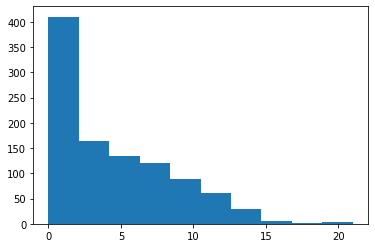

In [96]:
df = pd.DataFrame(data_large)
df.to_excel('data_set_17.xlsx', index = False)
from matplotlib import pyplot as plt
plt.hist(data_large['yr_counter2'])
plt.show()

In [78]:
### convert data to form input for FRONT 41
### take log, and make  SFF estimates
### GMM
print (len (data_large[data_large['yr_counter2']<0]))

45
